Load the dataset and explore the variables.
We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
Extract the target variable.
Extract the independent variables and scale them.
Build the logistic regression model.
Evaluate the model.
Even a simple model will give us more than 70% accuracy. Why?
Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points.
Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
#import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
customer_churn=pd.read_csv('customer_churn.csv')
customer_churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
columns = customer_churn.columns.values.tolist()
print(columns)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
dataset = customer_churn.drop(['customerID'], axis=1)

In [6]:
#Step 4: Converting Categorical Columns to Numeric Columns

In [7]:
dataset =  dataset.drop(['Churn'], axis=1)

In [8]:
Churn = pd.get_dummies(customer_churn.Churn).iloc[:,1:]
#gender = pd.get_dummies(customer_churn.gender).iloc[:,1:]

In [9]:
Churn

,Yes
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [10]:
dataset = pd.concat([dataset,Churn], axis=1)
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Yes
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [11]:
# X/y split
X = customer_churn[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = customer_churn['Churn']

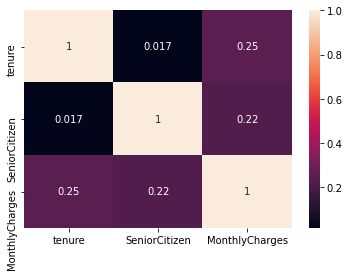

In [12]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [13]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # default fraction is .2

In [14]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
#classifier.fit(X_train, y_train) 
#predictions = classifier.predict(X_test)

In [16]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-1.282882,-0.436091,-1.310046
1,-1.037857,-0.436091,0.344832
2,-1.160369,-0.436091,-1.484331
3,-0.139429,-0.436091,0.373049
4,-1.201207,-0.436091,0.343172


In [17]:
#from sklearn.metrics import classification_report, accuracy_score
#print(classification_report(y_test,predictions )) 
#print(accuracy_score(y_test, predictions ))

In [18]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 

In [19]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=42, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [20]:
#feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(kind='barh')

In [21]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

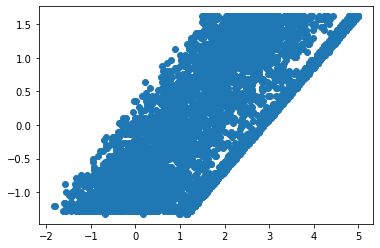

In [22]:
plt.scatter(logits,X_train_scaled['tenure'])

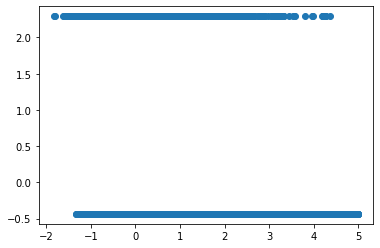

In [23]:
plt.scatter(logits,X_train_scaled['SeniorCitizen'])

<AxesSubplot:>

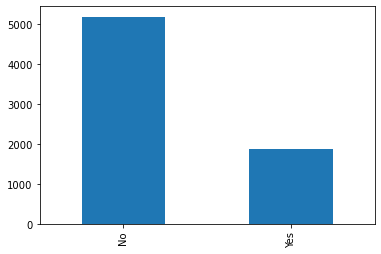

In [24]:
count_classes = customer_churn['Churn'].value_counts()
count_classes.plot(kind = 'bar')

In [25]:
!pip install imblearn
#pip install -U imbalanced-learn
import imblearn

# A relatively bad model

In [26]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7978421351504826

In [27]:
#while accuracy is not absolutely terrible, a closer look reveals some serious problems
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label="Yes"))
print("recall: ",recall_score(y_test,pred, pos_label="Yes"))
print("f1: ",f1_score(y_test,pred, pos_label="Yes"))

precision:  0.6964856230031949
recall:  0.4551148225469729
f1:  0.5505050505050505


In [28]:
#we fail to identify 40%+ of  cases!
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1187,   95],
       [ 261,  218]], dtype=int64)

# Oversampling / undersampling

In [29]:
from sklearn.utils import resample

In [30]:
# oversampling / undersampling is only to be done on the TRAINING set
# our test set still must reflect reality!
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-1.282882,-0.436091,-1.310046,Yes
1,-1.037857,-0.436091,0.344832,No
2,-1.160369,-0.436091,-1.484331,No
3,-0.139429,-0.436091,0.373049,No
4,-1.201207,-0.436091,0.343172,Yes


# Oversampling

In [31]:
# separate majority/minority classes
no_Churn = train[train['Churn']=='No']
yes_Churn = train[train['Churn']=='Yes']

In [32]:
display(no_Churn.shape)
display(yes_Churn.shape)

(3892, 4)

(1390, 4)

In [33]:
# oversample minority
yes_Churn_oversampled = resample(yes_Churn, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_Churn),#<- make both sets the same size
                                    random_state=0)

In [34]:
# both sets are now of a reasonable size
display(no_Churn.shape)
display(yes_Churn_oversampled.shape)

(3892, 4)

(3892, 4)

In [35]:
train_oversampled = pd.concat([no_Churn,yes_Churn_oversampled],axis=0)
train_oversampled.head(10)

,tenure,SeniorCitizen,MonthlyCharges,Churn
1,-1.037857,-0.436091,0.344832,No
2,-1.160369,-0.436091,-1.484331,No
3,-0.139429,-0.436091,0.373049,No
6,-1.037857,-0.436091,-0.978074,No
8,1.616588,-0.436091,0.902544,No
10,-1.282882,-0.436091,-1.497609,No
11,-1.078694,-0.436091,-1.500929,No
12,-0.139429,-0.436091,-1.479351,No
13,0.391460,-0.436091,-0.551491,No
14,-0.098592,-0.436091,-0.810429,No


In [36]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [37]:
y_train_over

1        No
2        No
3        No
6        No
8        No
       ... 
3867    Yes
4161    Yes
2804    Yes
768     Yes
3969    Yes
Name: Churn, Length: 7784, dtype: object

In [38]:
# Our Logistic Regression, while still not amazing, has improved substantially!
# especially at detecting instances of Churn
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label="Yes"))
print("recall: ",recall_score(y_test,pred, pos_label="Yes"))
print("f1: ",f1_score(y_test,pred, pos_label="Yes"))


#print("precision: ",precision_score(y_test,pred))
#print("recall: ",recall_score(y_test,pred))
#print("f1: ",f1_score(y_test,pred))


precision:  0.5163120567375886
recall:  0.7599164926931107
f1:  0.6148648648648649


In [39]:
confusion_matrix(y_test,pred)

array([[941, 341],
       [115, 364]], dtype=int64)

# Undersampling

In [40]:
# undersample majority
no_Churn_undersampled = resample(no_Churn, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_Churn),
                                    random_state=0)

In [41]:
# both sets are the same size
# small, but balanced, and no repeated data
display(yes_Churn.shape)
display(no_Churn_undersampled.shape)

(1390, 4)

(1390, 4)

In [42]:
train_undersampled = pd.concat([yes_Churn,no_Churn_undersampled])
train_undersampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-1.282882,-0.436091,-1.310046,Yes
4,-1.201207,-0.436091,0.343172,Yes
5,-1.282882,2.293097,-1.293447,Yes
7,0.799836,-0.436091,1.543248,Yes
9,0.922348,-0.436091,1.061890,Yes


In [43]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [44]:
# Still a slight improvement!
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label="Yes"))
print("recall: ",recall_score(y_test,pred, pos_label="Yes"))
print("f1: ",f1_score(y_test,pred, pos_label="Yes"))

#print("precision: ",precision_score(y_test,pred))
#print("recall: ",recall_score(y_test,pred))
#print("f1: ",f1_score(y_test,pred))

precision:  0.5168539325842697
recall:  0.7682672233820459
f1:  0.617968094038623


In [45]:
confusion_matrix(y_test,pred)

array([[938, 344],
       [111, 368]], dtype=int64)

# SMOTE

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [48]:
X_train_SMOTE.shape

(7784, 3)

In [49]:
# yet another small improvement, but bear in mind that we saved 12 hypothetical people with
# these "small improvements"
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

#print("precision: ",precision_score(y_test,pred))
#print("recall: ",recall_score(y_test,pred))
#print("f1: ",f1_score(y_test,pred))

print("precision: ",precision_score(y_test,pred, pos_label="Yes"))
print("recall: ",recall_score(y_test,pred, pos_label="Yes"))
print("f1: ",f1_score(y_test,pred, pos_label="Yes"))

precision:  0.5162659123055162
recall:  0.7620041753653445
f1:  0.6155143338954469


In [50]:
confusion_matrix(y_test,pred)

array([[940, 342],
       [114, 365]], dtype=int64)